# Implementación de la QFT para 4 cubits

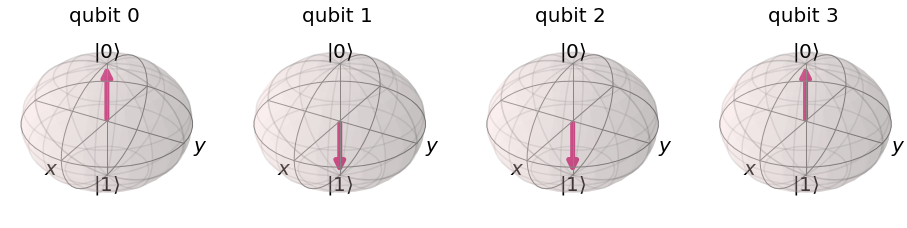

In [1]:
from pytket import Circuit
from pytket.backends.ibm import AerStateBackend, AerBackend
from qiskit.visualization import plot_bloch_multivector

c = Circuit(4,4)  # define a circuit with 4 qubits and 4 bits

##inicializo los cubits a |0110>
c.X(1)
c.X(2)

backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

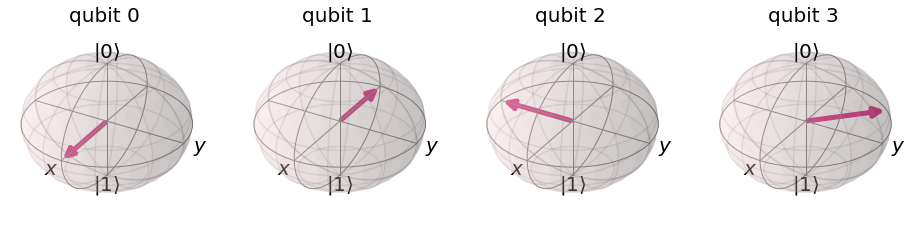

In [2]:
##QFT

c.H(3) 
c.CRz(0.5, 2, 3) 
c.CRz(0.25, 1, 3)
c.CRz(0.125, 0, 3)
c.add_barrier([0, 1, 2, 3])

c.H(2) 
c.CRz(0.5, 1, 2)
c.CRz(0.25, 0, 2)
c.add_barrier([0, 1, 2, 3])

c.H(1) 
c.CRz(0.5, 0, 1)
c.add_barrier([0, 1, 2, 3])

c.H(0)

c.SWAP(0,3)
c.SWAP(1,2)

backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

### Comentario:

Podemos ver como la QFT funciona ya que empezamos con el estado |0110> (6 en binario) y hacemos al cubit 3 rotar 6/16, al cubit 2 12/16, al cubit 1 24/16 (igual a hacer 8/16) y al cubit 0 48/16 (igual a hacer 0/16).

## QFT inversa

Si a la QFT le aplicamos la QFT inversa y medimos los cubits, deberíamos obtener el número original con el que empezamos |0110>.

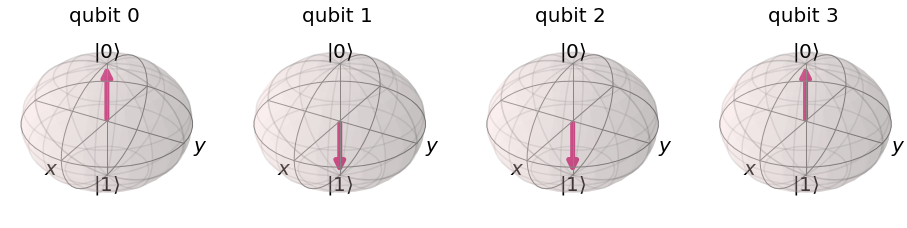

In [3]:
c.SWAP(0,3)
c.SWAP(1,2)

c.H(0)

c.add_barrier([0, 1, 2, 3])
c.CRz(-0.5, 0, 1)
c.H(1) 

c.add_barrier([0, 1, 2, 3])
c.CRz(-0.25, 0, 2)
c.CRz(-0.5, 1, 2)
c.H(2) 

c.add_barrier([0, 1, 2, 3])
c.CRz(-0.125, 0, 3)
c.CRz(-0.25, 1, 3)
c.CRz(-0.5, 2, 3) 
c.H(3) 

backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

Tal y como esperábamos, tras aplicar la QFT inversa a la QFT conseguimos de nuevo los estados iniciales de los cubits

In [4]:
c.measure_all()
b = AerBackend()
b.compile_circuit(c)
handle = b.process_circuit(c, 1000)
result = b.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(0, 1, 1, 0): 1000})


Podemos ver que las 1000 veces ejecutadas el circuito, nos ha dado el resultado esperado (el estado inicial), ya que le hemos aplicado la QFT y después la AQFT Inversa.

# Implementación de la AQFT para 4 cubits y 2 rotaciones

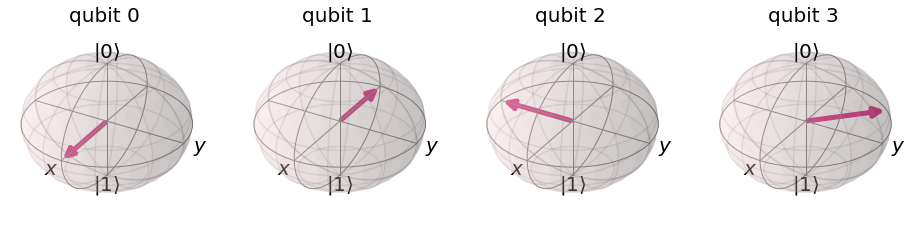

In [5]:
c = Circuit(4)  # define a circuit with 4 qubits and 4 bits

##inicializo los cubits a |0110>
c.X(1)
c.X(2)

##AQFT con 2 rotaciones como máximo

c.H(3) 
c.CRz(0.5, 2, 3) 
c.CRz(0.25, 1, 3)
c.add_barrier([0, 1, 2, 3])

c.H(2) 
c.CRz(0.5, 1, 2)
c.CRz(0.25, 0, 2)
c.add_barrier([0, 1, 2, 3])

c.H(1) 
c.CRz(0.5, 0, 1)
c.add_barrier([0, 1, 2, 3])

c.H(0)
c.SWAP(0,3)
c.SWAP(1,2)

backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

## AQFT inversa

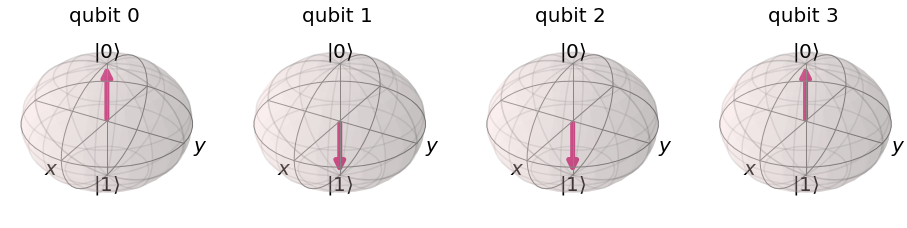

In [6]:
c.SWAP(0,3)
c.SWAP(1,2)

c.H(0)

c.add_barrier([0, 1, 2, 3])
c.CRz(-0.5, 0, 1)
c.H(1) 


c.add_barrier([0, 1, 2, 3])
c.CRz(-0.25, 0, 2)
c.CRz(-0.5, 1, 2)
c.H(2) 

c.add_barrier([0, 1, 2, 3])
c.CRz(-0.25, 1, 3)
c.CRz(-0.5, 2, 3) 
c.H(3) 

backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

In [7]:
c.measure_all()
b = AerBackend()
b.compile_circuit(c)
handle = b.process_circuit(c, 1000)
result = b.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(0, 1, 1, 0): 1000})


### Comentarios:

Al aplicar la AQFT y la AQFT inversa nos queda el mismo estado con el que empezamos.